In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
data = np.load("./sim_data/A1/A1_SBM_K4_dense_splits_seed42.npz")
# data = np.load("./sim_data/B1/B1_TranslationInvariant_RBF_ARD_splits_seed42.npz")
data.keys()

KeysView(NpzFile './sim_data/A1/A1_SBM_K4_dense_splits_seed42.npz' with keys: train, val, test)

In [89]:
data["test"].shape, data["val"].shape, data["train"].shape

((10438, 2), (5219, 2), (88727, 2))

In [2]:
# nodes = np.load("./sim_data/A1/A1_SBM_K4_dense_nodes.npz")
# nodes = np.load("./sim_data_batch/A1/A1_N50_train_00/A1_N50_train_00_nodes.npz")
# nodes = np.load("./sim_data_batch/A2/A2_N300_train_00/A2_N300_train_00_nodes.npz")
# nodes = np.load("./sim_data_batch/A2/A2_N50_train_00/A2_N50_train_00_nodes.npz")
nodes = np.load("./sim_data_batch/B1/B1_N50_train_00/B1_N50_train_00_nodes.npz")
nodes.keys()
# nodes = np.load("./sim_data/B1/B1_TranslationInvariant_RBF_ARD_nodes.npz")
# nodes = np.load("./sim_data_batch/B1/B1_N10000_train_00/B1_N10000_train_00_nodes.npz")
# nodes["positions"].shape

KeysView(NpzFile './sim_data_batch/B1/B1_N50_train_00/B1_N50_train_00_nodes.npz' with keys: positions, node_features)

In [3]:
# nodes["positions"].shape, nodes["blocks"].shape, nodes["node_features"].shape
nodes["positions"].shape, nodes["node_features"].shape

((50, 2), (50, 40))

In [4]:
nodes["positions"]

array([[ 3.19489964e-01, -7.67142655e-01],
       [ 5.05183950e-01,  8.27887212e-03],
       [ 3.57732594e-01,  1.12279218e-01],
       [ 1.17614789e+00,  4.88750013e-01],
       [ 1.05778766e+00,  4.13226153e-01],
       [-4.70220664e-01,  9.94975877e-01],
       [-1.72053530e-01,  3.38630656e-01],
       [ 7.31368258e-01, -3.33797275e-01],
       [-1.22783612e+00, -9.42762193e-01],
       [-7.00262384e-01, -5.74099396e-01],
       [-7.91588381e-01, -5.89522260e-01],
       [-2.42120594e-01, -8.98395249e-01],
       [-1.59692946e-01, -2.01808589e-01],
       [ 4.95444788e-01, -6.47946486e-01],
       [-7.65392756e-01,  2.90582899e-01],
       [-7.53042529e-01, -3.71097919e-01],
       [ 2.57836337e-01,  8.46830606e-01],
       [ 1.94188836e-01,  7.69900360e-01],
       [-1.60269135e+00,  5.73096305e-01],
       [-5.37377330e-01, -1.33253884e+00],
       [-1.12522771e+00, -6.30047661e-01],
       [ 5.49410687e-01, -1.85705903e-01],
       [ 1.22152991e-02, -7.06651002e-01],
       [-1.

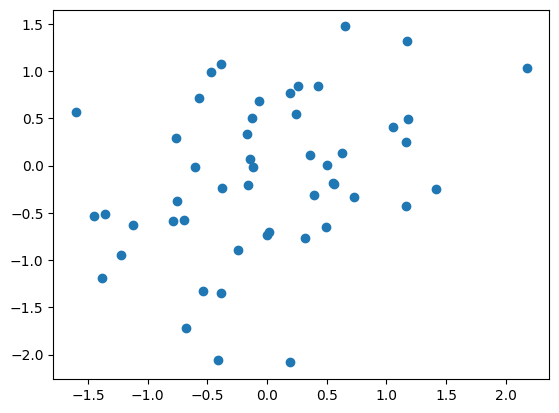

In [5]:
plt.scatter(nodes["positions"][:, 0], nodes["positions"][:, 1])

In [6]:
# edges = np.loadtxt("./sim_data_batch/A2/A2_N300_train_00/A2_N300_train_00_edges.txt")
# edges = np.loadtxt("./sim_data_batch/A2/A2_N50_train_00/A2_N50_train_00_edges.txt")
# edges = np.loadtxt("./sim_data_batch/A1/A1_N50_train_00/A1_N50_train_00_edges.txt")
# edges = np.loadtxt("./sim_data_batch/A1/A1_N300_train_00/A1_N300_train_00_edges.txt")
edges = np.loadtxt("./sim_data_batch/B1/B1_N300_train_00/B1_N300_train_00_edges.txt")
edges.shape

(335, 2)

In [22]:
np.log(50)/50, 48 / (50*49/2)

(np.float64(0.07824046010856292), 0.03918367346938775)

In [13]:
np.log(200)/200, 243 / (200*199/2)

(np.float64(0.02649158683274018), 0.012211055276381909)

In [7]:
np.log(300)/300, 335 / (300*299/2)

(np.float64(0.019012608248854004), 0.007469342251950947)

In [45]:
np.log(50)/50, 243 / (50*49/2)

(np.float64(0.07824046010856292), 0.1983673469387755)

In [47]:
np.log(50)/50, 421 / (50*49/2)

(np.float64(0.07824046010856292), 0.3436734693877551)

In [49]:
np.log(300)/300, 4914 / (300*299/2)

(np.float64(0.019012608248854004), 0.10956521739130434)

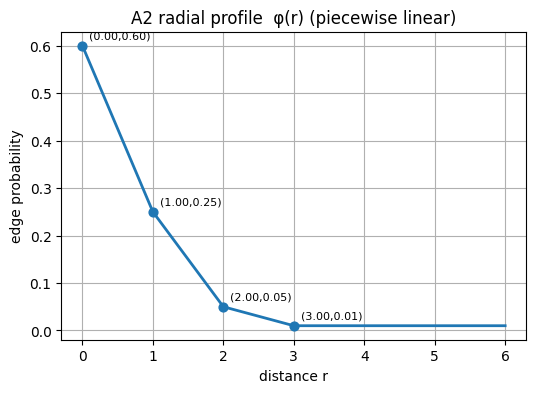

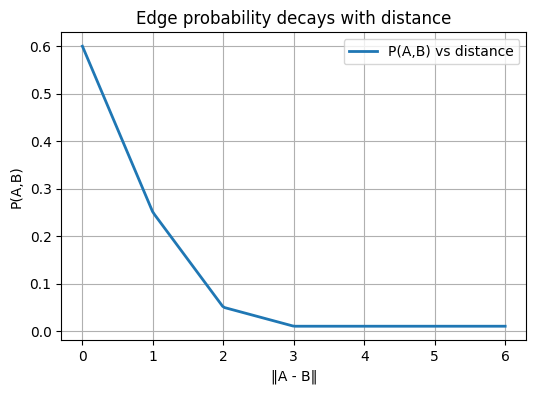

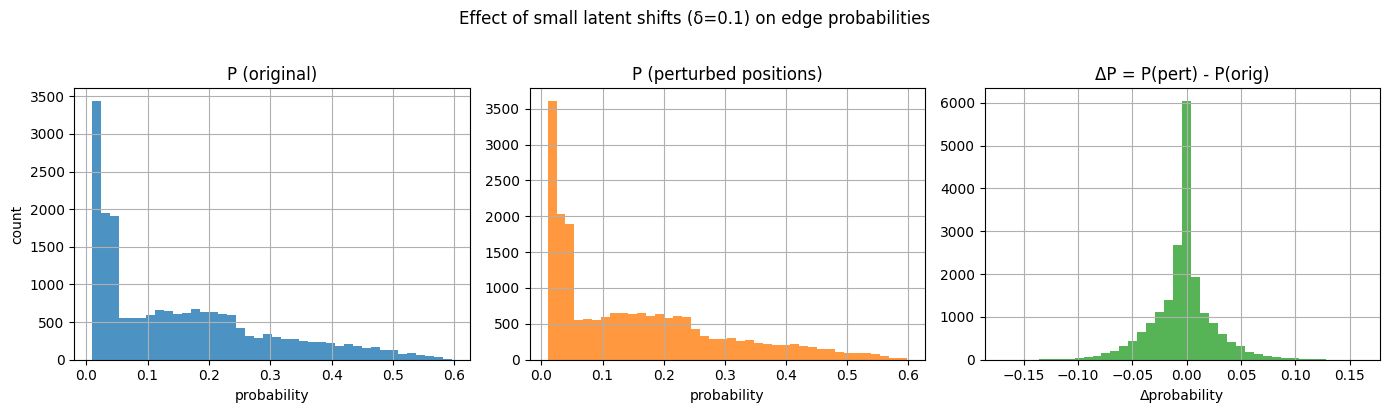

In [29]:
#!/usr/bin/env python3
# Demo: A2 radial kernel intuition (piecewise-linear spline over distance)
# Requirements: numpy, matplotlib

import numpy as np
import matplotlib.pyplot as plt

# ==== A2 implementation (same logic as your code) ====

class RadialSpline:
    def __init__(self, values, rmax):
        self.values = np.array(values, dtype=float)
        self.rmax = float(rmax)
        self.K = len(values) - 1

    def __call__(self, r):
        # piecewise linear on [0, rmax] with K segments, tail fixed to last value
        r = np.clip(r, 0.0, None)
        t = np.clip(r / self.rmax, 0.0, 1.0)
        idx = np.minimum((t * self.K).astype(int), self.K - 1)
        frac = t * self.K - idx
        v0 = self.values[idx]
        v1 = self.values[idx + 1]
        return v0 * (1 - frac) + v1 * frac

def kernel_radial_smooth(X, values, rmax):
    spline = RadialSpline(values, rmax)
    D = np.linalg.norm(X[:, None, :] - X[None, :, :], axis=-1)
    return spline(D)  # matrix of probabilities P_ij = φ(‖x_i - x_j‖)

# ==== Parameters you can play with ====
values = [0.6, 0.25, 0.05, 0.01]  # radial profile samples (distance bins)
rmax   = 3.0                      # max distance for the spline table (tail fixed to last value)
rng    = np.random.default_rng(0)

# ==== 1) Visualize the radial profile φ(r) itself ====
r = np.linspace(0, 6, 400)          # distances to query (beyond rmax will be flat at values[-1])
spline = RadialSpline(values, rmax)
phi = spline(r)

fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(r, phi, lw=2)
# annotate breakpoints
bp = np.linspace(0, rmax, len(values))
ax1.scatter(bp, values, s=40, zorder=3)
for b, v in zip(bp, values):
    ax1.annotate(f"({b:.2f},{v:.2f})", (b, v), textcoords="offset points", xytext=(5, 5), fontsize=8)
ax1.set_title("A2 radial profile  φ(r) (piecewise linear)")
ax1.set_xlabel("distance r")
ax1.set_ylabel("edge probability")
ax1.grid(True)

# ==== 2) Two-node intuition: move node B away from A and track P(A,B) ====
A = np.array([0.0, 0.0])             # fixed node A
r_traj = np.linspace(0.0, 6.0, 200)  # move B along x-axis
P_AB = spline(r_traj)                # since r = ‖B - A‖ = x-distance

fig2, ax2 = plt.subplots(figsize=(6, 4))
ax2.plot(r_traj, P_AB, lw=2, label="P(A,B) vs distance")
ax2.set_title("Edge probability decays with distance")
ax2.set_xlabel("‖A - B‖")
ax2.set_ylabel("P(A,B)")
ax2.grid(True)
ax2.legend()

# ==== 3) Small graph: how probabilities change under small position perturbation ====
N = 200
X = rng.normal(size=(N, 2))  # isotropic Gaussian latent positions (as in A2)
P0 = kernel_radial_smooth(X, values, rmax)

# Apply a small perturbation δ to positions (e.g., simulating feature/latent drift)
delta = 0.1
X_pert = X + rng.normal(scale=delta, size=X.shape)
P1 = kernel_radial_smooth(X_pert, values, rmax)

# Compare distributions of P (flatten upper triangle to avoid duplicates)
iu = np.triu_indices(N, k=1)
p0 = P0[iu]
p1 = P1[iu]
dp = p1 - p0

fig3, axs = plt.subplots(1, 3, figsize=(14, 4))
axs[0].hist(p0, bins=40, alpha=0.8)
axs[0].set_title("P (original)")
axs[0].set_xlabel("probability"); axs[0].set_ylabel("count")
axs[0].grid(True)

axs[1].hist(p1, bins=40, alpha=0.8, color="tab:orange")
axs[1].set_title("P (perturbed positions)")
axs[1].set_xlabel("probability"); axs[1].grid(True)

axs[2].hist(dp, bins=40, alpha=0.8, color="tab:green")
axs[2].set_title("ΔP = P(pert) - P(orig)")
axs[2].set_xlabel("Δprobability"); axs[2].grid(True)

fig3.suptitle(f"Effect of small latent shifts (δ={delta}) on edge probabilities", y=1.02)
plt.tight_layout()
plt.show()


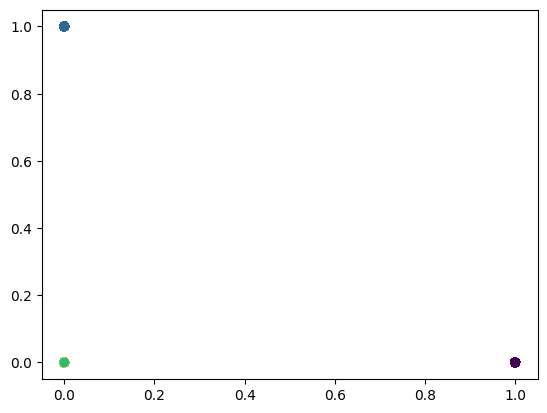

In [21]:
plt.scatter(nodes["positions"][:,0], nodes["positions"][:,1], c=nodes["blocks"], cmap="viridis")

In [ ]:
{
        "name": name,
        "seed": int(seed),
        "graph": {"N": int(N), "expected_degree": 20, "directed": False, "self_loops": False},
        "latent_space": {
            "dimension": 2,
            "base_measure": {"type": "categorical_blocks", "params": {"K": 4, "pi": [0.25, 0.25, 0.25, 0.25]}},
        },
        "kernel": {
            "type": "block_constant",
            "params": {
                "B": [
                    [0.06, 0.01, 0.01, 0.01],
                    [0.01, 0.06, 0.01, 0.01],
                    [0.01, 0.01, 0.06, 0.01],
                    [0.01, 0.01, 0.01, 0.06],
                ]
            },
        },
        "degree_correction": {"enabled": False, "distribution": "lognormal", "params": {"mu": 0.0, "sigma": 0.0}},
        "attributes": {"node_features": {"enabled": False, "emission": "none", "params": {}}, "edge_features": {"enabled": False, "emission": "none", "params": {}}},
        "observation": {"missing_edges": {"type": "MAR", "rate": 0.10}},
        "evaluation": {"holdout_edge_fraction": 0.10, "negative_sampling_ratio": 5},
        "temporal": {"enabled": False, "steps": 0, "deformation": {"bandwidth_scale_per_step": 1.0}},
    }

In [39]:
from rgm_sims import kernels as K
from rgm_sims import distributions as dist

In [44]:
N = 100
rng = np.random.default_rng(123)

Kc = 4
pi = [0.25, 0.25, 0.25, 0.25]
z_blocks = rng.choice(Kc, size=N, p=np.array(pi))
z_blocks

array([2, 0, 0, 0, 0, 3, 3, 1, 3, 3, 2, 0, 3, 0, 2, 2, 3, 0, 3, 2, 0, 0,
       1, 2, 0, 0, 1, 2, 3, 2, 3, 3, 0, 3, 2, 1, 3, 3, 1, 2, 0, 2, 0, 3,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 3, 2, 1, 3, 1, 3, 2, 1, 1, 0,
       1, 2, 3, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 3, 0, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 2, 0, 0, 1, 0, 3, 0, 0])

In [52]:
d = 2
Kc = 4
weights = [0.25, 0.25, 0.25, 0.25]
means = [[2.5, 0.0], [0.0, 2.5], [-2.5, 0.0], [0.0, -2.5]]
cov_scale = 0.5
X, z_blocks = dist.gaussian_mixture(rng, N, d, Kc, weights, means, cov_scale)

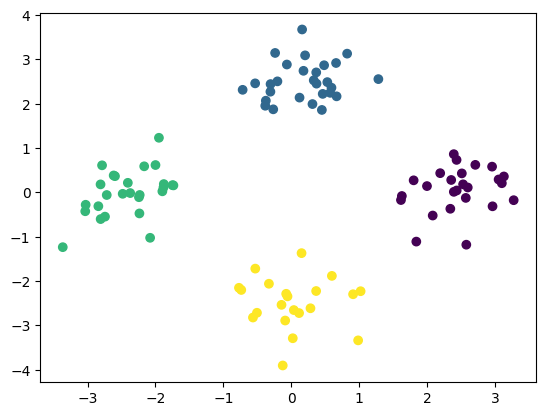

In [53]:
plt.scatter(X[:,0], X[:,1], c=z_blocks, cmap="viridis")

In [58]:
B = np.array([
    [0.08, 0.01, 0.01, 0.01],
    [0.01, 0.08, 0.01, 0.01],
    [0.01, 0.01, 0.08, 0.01],
    [0.01, 0.01, 0.01, 0.08]
])
B

array([[0.08, 0.01, 0.01, 0.01],
       [0.01, 0.08, 0.01, 0.01],
       [0.01, 0.01, 0.08, 0.01],
       [0.01, 0.01, 0.01, 0.08]])

In [70]:
P = K.kernel_block_constant(z_blocks, B)
P

array([[0.08, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.08, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.08, ..., 0.08, 0.08, 0.01],
       ...,
       [0.01, 0.01, 0.08, ..., 0.08, 0.08, 0.01],
       [0.01, 0.01, 0.08, ..., 0.08, 0.08, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.08]])

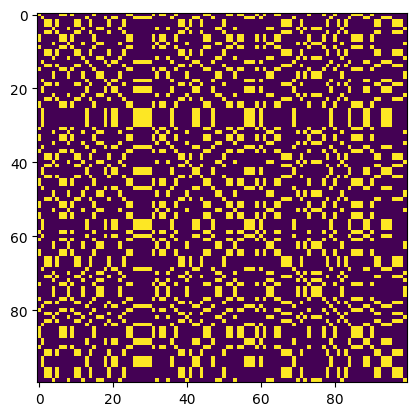

In [71]:
plt.imshow(P, cmap="viridis")

In [72]:
logit = np.log(P + 1e-9) - np.log(1 - P + 1e-9)
logit

array([[-2.44234702, -4.59511975, -4.59511975, ..., -4.59511975,
        -4.59511975, -4.59511975],
       [-4.59511975, -2.44234702, -4.59511975, ..., -4.59511975,
        -4.59511975, -4.59511975],
       [-4.59511975, -4.59511975, -2.44234702, ..., -2.44234702,
        -2.44234702, -4.59511975],
       ...,
       [-4.59511975, -4.59511975, -2.44234702, ..., -2.44234702,
        -2.44234702, -4.59511975],
       [-4.59511975, -4.59511975, -2.44234702, ..., -2.44234702,
        -2.44234702, -4.59511975],
       [-4.59511975, -4.59511975, -4.59511975, ..., -4.59511975,
        -4.59511975, -2.44234702]])

In [82]:
SIGMOID = lambda x: 1.0 / (1.0 + np.exp(-x))

directed = False
expected_degree = 10

target_m = expected_degree * N / (2 if not directed else 1)
mean_p = P.mean() if directed else P[np.triu_indices(N, 1)].mean()
if mean_p > 0:
    scale = target_m / (mean_p * (N*(N-1)/2 if not directed else N*(N-1)))
    # adjust by adding scalar to logits
    adj = np.log(scale + 1e-9)
    logit = logit + adj
    P = SIGMOID(logit)

P

array([[0.35557586, 0.06023415, 0.06023415, ..., 0.06023415, 0.06023415,
        0.06023415],
       [0.06023415, 0.35557586, 0.06023415, ..., 0.06023415, 0.06023415,
        0.06023415],
       [0.06023415, 0.06023415, 0.35557586, ..., 0.35557586, 0.35557586,
        0.06023415],
       ...,
       [0.06023415, 0.06023415, 0.35557586, ..., 0.35557586, 0.35557586,
        0.06023415],
       [0.06023415, 0.06023415, 0.35557586, ..., 0.35557586, 0.35557586,
        0.06023415],
       [0.06023415, 0.06023415, 0.06023415, ..., 0.06023415, 0.06023415,
        0.35557586]])

In [86]:
P.shape

(100, 100)

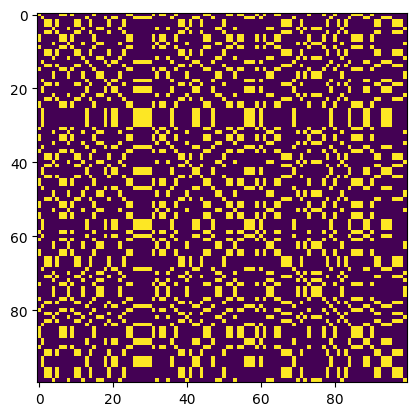

In [83]:
plt.imshow(P, cmap="viridis")

In [84]:
from rgm_sims import generator as G
self_loops = False
E = G._edge_sample_from_probs(rng, P, directed=directed, self_loops=self_loops)

In [85]:
E.shape

(594, 2)

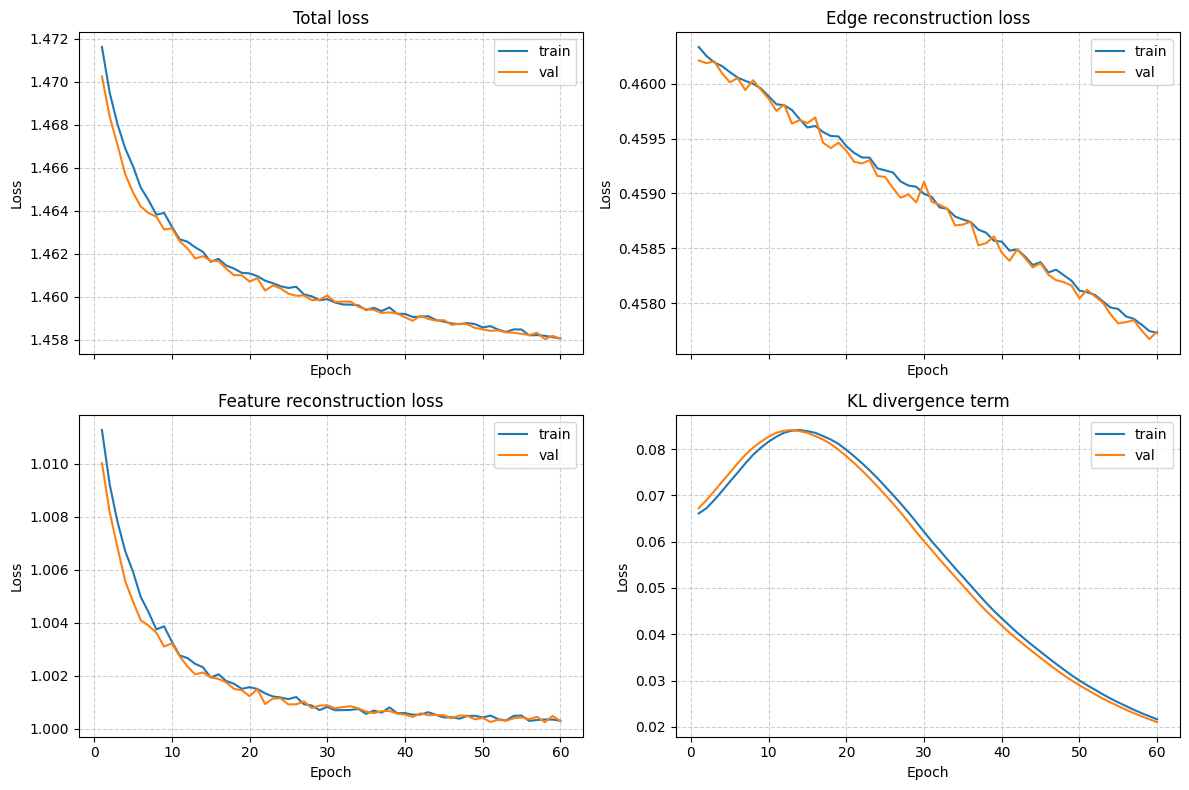

In [1]:
# File: plot_losses.py

import numpy as np
import matplotlib.pyplot as plt
import os

def plot_losses(loss_file: str, save_fig: bool = False):
    data = np.load(loss_file)

    # Extract arrays
    train_total = data["train_total"]
    val_total   = data["val_total"]
    train_edge  = data["train_edge"]
    val_edge    = data["val_edge"]
    train_feat  = data["train_feat"]
    val_feat    = data["val_feat"]
    train_kl    = data["train_kl"]
    val_kl      = data["val_kl"]

    epochs = np.arange(1, len(train_total) + 1)

    fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
    axs = axs.ravel()

    axs[0].plot(epochs, train_total, label="train")
    axs[0].plot(epochs, val_total, label="val")
    axs[0].set_title("Total loss")
    axs[0].legend()

    axs[1].plot(epochs, train_edge, label="train")
    axs[1].plot(epochs, val_edge, label="val")
    axs[1].set_title("Edge reconstruction loss")
    axs[1].legend()

    axs[2].plot(epochs, train_feat, label="train")
    axs[2].plot(epochs, val_feat, label="val")
    axs[2].set_title("Feature reconstruction loss")
    axs[2].legend()

    axs[3].plot(epochs, train_kl, label="train")
    axs[3].plot(epochs, val_kl, label="val")
    axs[3].set_title("KL divergence term")
    axs[3].legend()

    for ax in axs:
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()

    if save_fig:
        out_path = os.path.splitext(loss_file)[0] + "_curves.png"
        plt.savefig(out_path, dpi=150)
        print(f"Saved figure to {out_path}")
    else:
        plt.show()


if __name__ == "__main__":
    loss_path = r"D:\rebuttal2025\models\checkpoints\rg_vae_B1_losses.npz"
    plot_losses(loss_path, save_fig=False)
